In [6]:
# Problem 2 at https://pages.mtu.edu/~dnaneet/2150/notes/problems/sfd_bmd_prelim.html
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import SingularityFunction

In [2]:
E, I = sympy.symbols('E,I')
b = Beam(1, E, I)

b.apply_load(-1, 0, 0, 1) #udl of -1 kN/m as polynomial of order 0, 
                          #applied between x=0 and x=1
b.bc_deflection.append((0,0))
b.bc_slope.append((0,0))

R1, R2 = sympy.symbols('R1,R2')
b.apply_load(R1, 0, -1)
b.apply_load(R2, 0, -2)

b.load

R1*SingularityFunction(x, 0, -1) + R2*SingularityFunction(x, 0, -2) - SingularityFunction(x, 0, 0) + SingularityFunction(x, 1, 0)

In [3]:
b.solve_for_reaction_loads(R1, R2)
b.reaction_loads

{R1: 1, R2: -1/2}

In [13]:
b.load
b.shear_force()

-SingularityFunction(x, 0, -1)/2 + SingularityFunction(x, 0, 0) - SingularityFunction(x, 0, 1) + SingularityFunction(x, 1, 1)

In [ ]:
#These sher force and bending moment functions do not seem to work with moment singularity functions.
#See below alternative approach by defining sf and bm, symbolic variables.

#b.plot_shear_force()
#b.plot_bending_moment()

In [17]:
x = sympy.symbols('x')
sf = b.shear_force()
bm = b.bending_moment()

/usr/lib/python3/dist-packages/sympy/plotting/plot.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


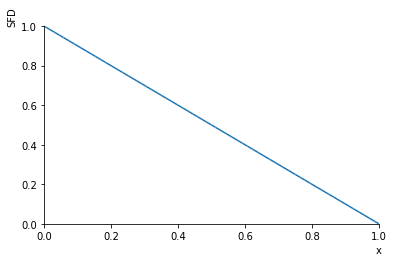

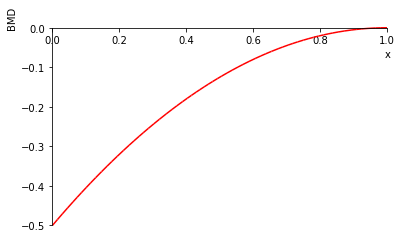

In [21]:
sympy.plot(sf, (x, 0, 1), ylabel='SFD')

sympy.plot(bm, (x, 0, 1), ylabel='BMD', line_color='red')